In [134]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [135]:
precision_map_path = r'csv\precision_map.csv'
precision_small_map_path = r'csv\precision_small_map.csv'
precision_medium_map_path = r'csv\precision_medium_map.csv'
precision_large_map_path = r'csv\precision_large.csv'
recall_ar_path = r'csv\recall_ar.csv'
recall_small_ar_path = r'csv\recall_small_ar.csv'
recall_medium_ar_path = r'csv\recall_medium_ar.csv'
recall_large_ar_path = r'csv\recall_large_ar.csv'
train_loss_path = r"csv\Train_loss.csv"
eval_loss_path = r'csv\Eval_loss.csv'
confusion_matrix_path = r'csv\confusion_matrix.csv'
label_path = r'config\label_map.pbtxt'
MAIN_FOLDER_PATH = os.path.dirname(os.getcwd())

In [136]:
MAIN_FOLDER_PATH

'D:\\Code_school_nam3ki2\\TestModel'

In [137]:
precision_map = pd.read_csv(os.path.join(MAIN_FORDER_PATH, precision_map_path))
precision_small_map = pd.read_csv(os.path.join(MAIN_FORDER_PATH, precision_small_map_path))
precision_medium_map = pd.read_csv(os.path.join(MAIN_FORDER_PATH, precision_medium_map_path))
precision_large = pd.read_csv(os.path.join(MAIN_FORDER_PATH, precision_large_map_path))
recall_ar = pd.read_csv(os.path.join(MAIN_FORDER_PATH, recall_ar_path))
recall_small_ar = pd.read_csv(os.path.join(MAIN_FORDER_PATH, recall_small_ar_path))
recall_medium_ar = pd.read_csv(os.path.join(MAIN_FORDER_PATH, recall_medium_ar_path))
recall_large_ar = pd.read_csv(os.path.join(MAIN_FORDER_PATH, recall_large_ar_path))
train_loss = pd.read_csv(os.path.join(MAIN_FORDER_PATH, train_loss_path))
eval_loss = pd.read_csv(os.path.join(MAIN_FORDER_PATH, eval_loss_path))

NameError: name 'MAIN_FORDER_PATH' is not defined

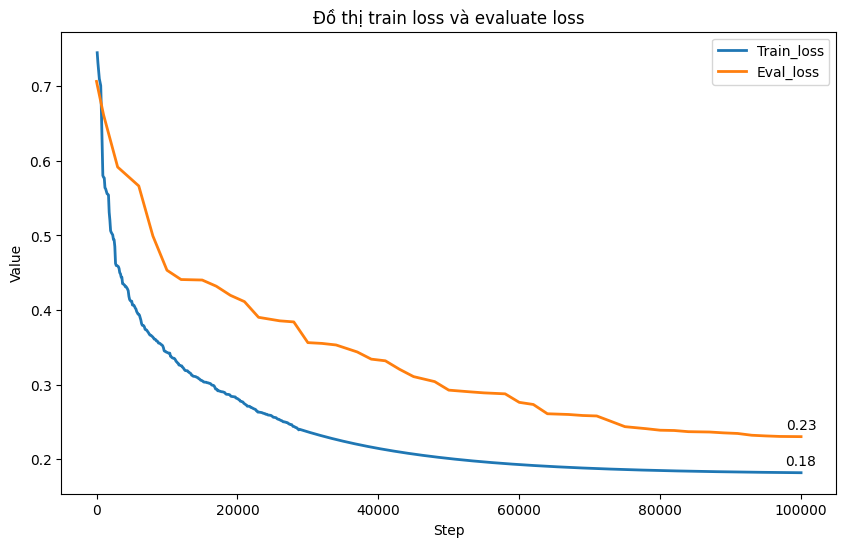

In [138]:
# Vẽ đồ thị train loss và eval loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss['Step'], train_loss['Value'], label='Train_loss', linewidth=2)
plt.plot(eval_loss['Step'], eval_loss['Value'], label='Eval_loss', linewidth=2)
# Thêm giá trị cuối cùng vào đồ thị
for data in [train_loss, eval_loss]:
    plt.annotate(f'{data["Value"].values[-1]:.2f}', 
                 (data["Step"].values[-1], data["Value"].values[-1]), 
                 textcoords="offset points", 
                 xytext=(0, 5), 
                 ha='center')
plt.title('Đồ thị train loss và evaluate loss')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.show()

In [139]:
f1_score = 2 * precision_map['Value'] * recall_ar['Value'] / (precision_map['Value'] + recall_ar['Value'])

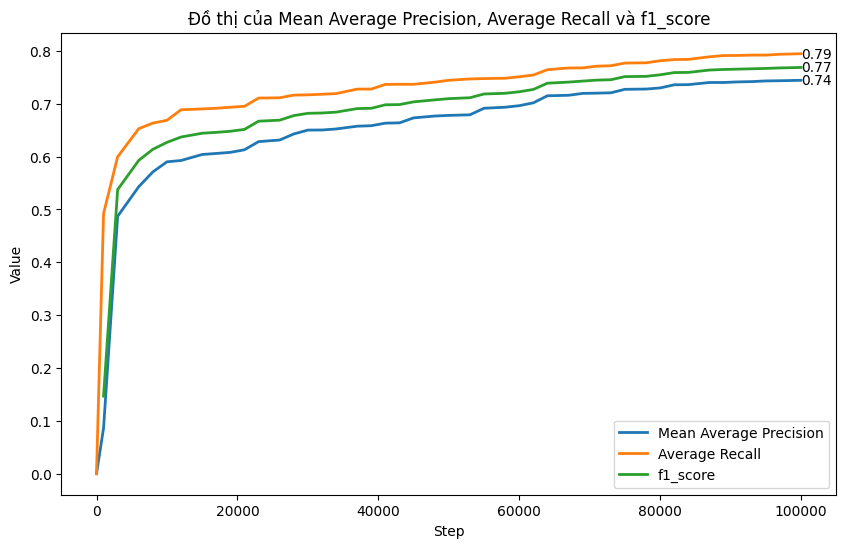

In [140]:
# Vẽ đồ thị precision, recall và f1_score
plt.figure(figsize=(10, 6))
plt.plot(precision_map['Step'], precision_map['Value'], label='Mean Average Precision', linewidth=2)
plt.plot(recall_ar['Step'], recall_ar['Value'], label='Average Recall', linewidth=2)
plt.plot(recall_ar['Step'], f1_score, label='f1_score', linewidth=2)
# Thêm giá trị cuối cùng vào đồ thị
for data in [precision_map, recall_ar]:
    plt.annotate(f'{data["Value"].values[-1]:.2f}', 
                 (data["Step"].values[-1], data["Value"].values[-1]), 
                 textcoords="offset points", 
                 xytext=(11, -3), 
                 ha='center')
# Thêm giá trị cuối cùng của f1_score vào đồ thị
plt.annotate(f'{f1_score.values[-1]:.2f}', 
             (recall_ar["Step"].values[-1], f1_score.values[-1]), 
             textcoords="offset points", 
             xytext=(11,-3), 
             ha='center')
plt.title('Đồ thị của Mean Average Precision, Average Recall và f1_score')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend()
plt.show()

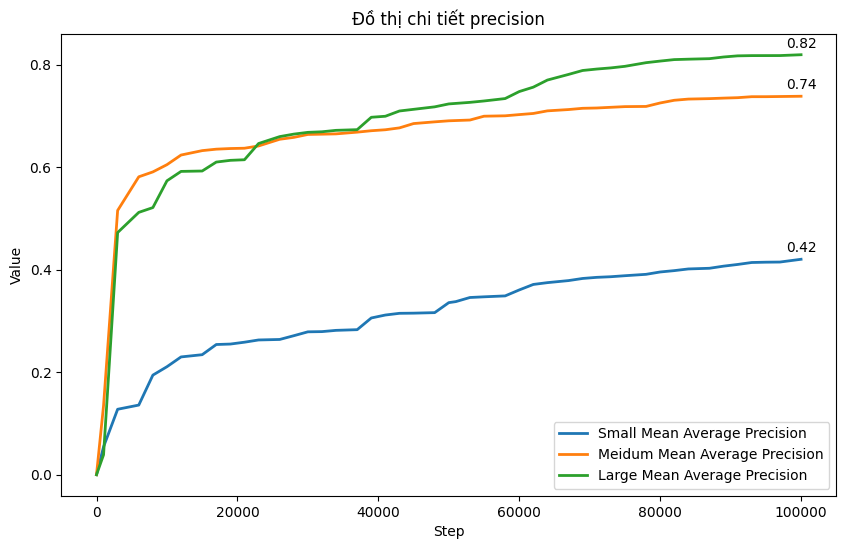

In [141]:
# Vẽ đồ thị chi tiết của precision
plt.figure(figsize=(10, 6))
plt.plot(precision_small_map['Step'], precision_small_map['Value'], label='Small Mean Average Precision', linewidth=2)
plt.plot(precision_medium_map['Step'], precision_medium_map['Value'], label='Meidum Mean Average Precision', linewidth=2)
plt.plot(precision_large['Step'], precision_large['Value'], label='Large Mean Average Precision', linewidth=2)
# Thêm giá trị cuối cùng vào đồ thị
for data in [precision_small_map, precision_medium_map, precision_large]:
    plt.annotate(f'{data["Value"].values[-1]:.2f}', 
                 (data["Step"].values[-1], data["Value"].values[-1]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')
plt.title('Đồ thị chi tiết precision')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

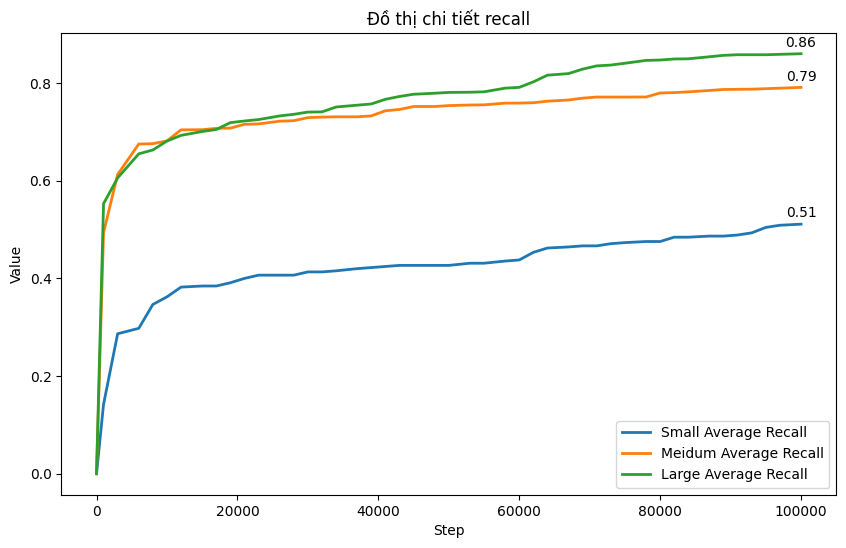

In [142]:
# Vẽ đồ thị chi tiết của recall
plt.figure(figsize=(10, 6))
plt.plot(recall_small_ar['Step'], recall_small_ar['Value'], label='Small Average Recall', linewidth=2)
plt.plot(recall_medium_ar['Step'], recall_medium_ar['Value'], label='Meidum Average Recall', linewidth=2)
plt.plot(recall_large_ar['Step'], recall_large_ar['Value'], label='Large Average Recall', linewidth=2)
# Thêm giá trị cuối cùng vào đồ thị
for data in [recall_small_ar, recall_medium_ar, recall_large_ar]:
    plt.annotate(f'{data["Value"].values[-1]:.2f}', 
                 (data["Step"].values[-1], data["Value"].values[-1]), 
                 textcoords="offset points", 
                 xytext=(0,5), 
                 ha='center')
plt.title('Đồ thị chi tiết recall')
plt.xlabel('Step')
plt.ylabel('Value')
plt.legend(loc='lower right')
plt.show()

In [143]:
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(10,7))
    ax = sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = cmap)
    ax.set_xticklabels(classes, rotation=0, va='top', position=(0,1.04))
    ax.tick_params(axis='x', labeltop=True, top=True, labelbottom=False, bottom=False)
    ax.set_yticklabels(classes, rotation=0, va='top')
    ax.tick_params(axis='y', labeltop=True, top=True, labelbottom=False, bottom=False)

    ax.yaxis.set_label_position("left") # Di chuyển nhãn y sang trái
    #Xoay nhãn y 90 độ
    ax.set_ylabel('Nhãn thực tế', rotation=0, labelpad=30)
    ax.set_xlabel('Nhãn dự đoán', rotation=0, labelpad=30)
    ax.set_title('Ma trận nhầm lẫn', size = 15, pad=20)
    plt.savefig('confusion_matrix.png')

In [144]:
from object_detection.utils import label_map_util
import seaborn as sns

In [145]:
categories = label_map_util.create_category_index_from_labelmap(os.path.join(MAIN_FOLDER_PATH, label_path))

In [146]:
categories

{1: {'id': 1, 'name': 'licence'}}

In [147]:
classes = [category['name'] for k, category in categories.items()] + ['No detection']
classes

['licence', 'No detection']

In [157]:
confusion_matrix = pd.read_csv(os.path.join(MAIN_FOLDER_PATH, confusion_matrix_path),header=None)
confusion_matrix = confusion_matrix.values.astype(float)
confusion_matrix[1][0] = 124
confusion_matrix[0][1] = 164
confusion_matrix

array([[912., 164.],
       [124.,   0.]])

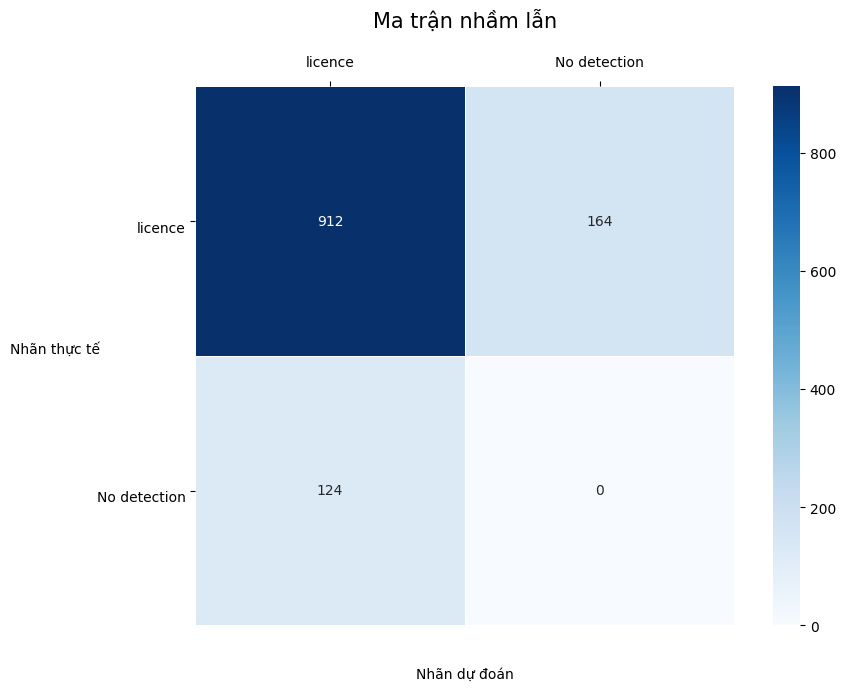

In [158]:
plot_confusion_matrix(confusion_matrix, classes)

In [159]:
IOU_THRESHOLD = 0.5

In [160]:
def display(confusion_matrix, categories):
    results = []

    for i in range(1, len(categories) + 1):
        id = categories[i]['id'] - 1
        name = categories[i]['name']
        
        total_target = np.sum(confusion_matrix[id,:])
        total_predicted = np.sum(confusion_matrix[:,id])
        
        precision = float(confusion_matrix[id, id] / total_predicted)
        recall = float(confusion_matrix[id, id] / total_target)
        
        results.append({'category' : name, f'precision_@{IOU_THRESHOLD}IOU' : precision, f'recall_@{IOU_THRESHOLD}IOU' : recall})
    
    df = pd.DataFrame(results)
    accuracies = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # Tính toán F1 Score
    df['f1_score_@0.5IOU'] = 2 * (df['precision_@0.5IOU'] * df['recall_@0.5IOU']) / (df['precision_@0.5IOU'] + df['recall_@0.5IOU'])
    # Vẽ biểu đồ
    ax1.set_title('Biểu đồ Precision, Recall, F1 Score @0.5IOU')
    ax1 = df.plot(y=['precision_@0.5IOU', 'recall_@0.5IOU', 'f1_score_@0.5IOU'], kind='bar', figsize=(10,7),
                  ax=ax1, label=['precision_@0.5IOU', 'recall_@0.5IOU', 'f1_score_@0.5IOU'], width=0.7)
    # Xoay nhãn về thẳng
    ax1.set_xticklabels(df['category'], rotation=0)
    ax1.set_ylabel('Giá trị', rotation=0, labelpad=30)
    # Hiện giá trị các nhãn trên cột và canh giữa
    for p in ax1.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax1.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
    ax1.legend(loc='lower right')
    # Calculate accuracy
    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
    ax2.set_title('Model Accuracy')
    # Plot 'total_accuracy'
    ax2.bar('accuracy', accuracy, color='blue', label='accuracy', width=0.7)
    ax2.set_xlim([-1, 1]) 
    for p in ax2.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax2.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
    ax2.legend(loc='lower right')

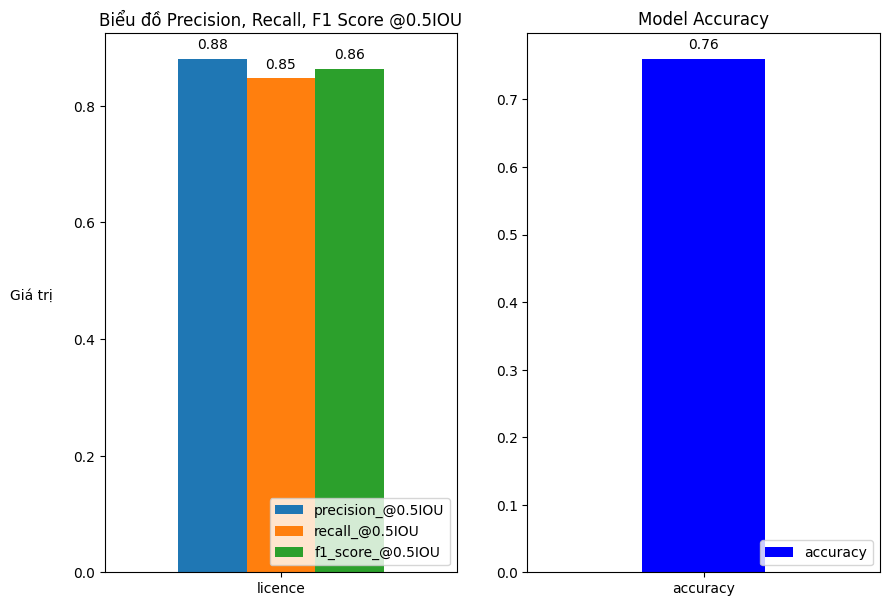

In [161]:
display(confusion_matrix, categories)